In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Ex. 5

In [3]:
dataset_file = '../datasets/Default.csv'
data = pd.read_csv(dataset_file)
data.default = data.default.apply(lambda v: 1 if v == 'Yes' else 0)
data.student = data.student.apply(lambda v: 1 if v == 'Yes' else 0)
data.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [4]:
data.loc[data.isna().any(axis=1)]

,default,student,balance,income


In [5]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
model = LogisticRegression().fit(data[['balance', 'income']], data['default'])
print(classification_report(data['default'], model.predict(data[['balance', 'income']])))
print(confusion_matrix(data['default'], model.predict(data[['balance', 'income']])))
print(accuracy_score(data['default'], model.predict(data[['balance', 'income']])))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9667
           1       0.74      0.32      0.45       333

    accuracy                           0.97     10000
   macro avg       0.86      0.66      0.72     10000
weighted avg       0.97      0.97      0.97     10000

[[9629   38]
 [ 225  108]]
0.9737


In [7]:
train_set, val_set = train_test_split(data, random_state=1, train_size=0.5)
model2 = LogisticRegression().fit(train_set[['balance', 'income']], train_set['default'])
print(classification_report(val_set['default'], model2.predict(val_set[['balance', 'income']])))
print(confusion_matrix(val_set['default'], model2.predict(val_set[['balance', 'income']])))
print(accuracy_score(val_set['default'], model2.predict(val_set[['balance', 'income']])))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4841
           1       0.00      0.00      0.00       159

    accuracy                           0.97      5000
   macro avg       0.48      0.50      0.49      5000
weighted avg       0.94      0.97      0.95      5000

[[4839    2]
 [ 159    0]]
0.9678


In [8]:
train_set, val_set = train_test_split(data, random_state=2, train_size=0.5)
model2 = LogisticRegression().fit(train_set[['balance', 'income']], train_set['default'])
print(classification_report(val_set['default'], model2.predict(val_set[['balance', 'income']])))
print(confusion_matrix(val_set['default'], model2.predict(val_set[['balance', 'income']])))
print(accuracy_score(val_set['default'], model2.predict(val_set[['balance', 'income']])))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4846
           1       0.00      0.00      0.00       154

    accuracy                           0.97      5000
   macro avg       0.48      0.50      0.49      5000
weighted avg       0.94      0.97      0.95      5000

[[4844    2]
 [ 154    0]]
0.9688


In [9]:
train_set, val_set = train_test_split(data, random_state=3, train_size=0.5)
model2 = LogisticRegression().fit(train_set[['balance', 'income']], train_set['default'])
print(classification_report(val_set['default'], model2.predict(val_set[['balance', 'income']])))
print(confusion_matrix(val_set['default'], model2.predict(val_set[['balance', 'income']])))
print(accuracy_score(val_set['default'], model2.predict(val_set[['balance', 'income']])))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4831
           1       0.00      0.00      0.00       169

    accuracy                           0.97      5000
   macro avg       0.48      0.50      0.49      5000
weighted avg       0.93      0.97      0.95      5000

[[4830    1]
 [ 169    0]]
0.966


Results are very similar, but not identical.

In [10]:
train_set, val_set = train_test_split(data, random_state=4, train_size=0.5)
model3 = LogisticRegression().fit(train_set[['balance', 'income', 'student']], train_set['default'])
pred_y = model3.predict(val_set[['balance', 'income', 'student']])
print(classification_report(val_set['default'], pred_y))
print(confusion_matrix(val_set['default'], pred_y))
print(accuracy_score(val_set['default'], pred_y))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4837
           1       0.74      0.37      0.50       163

    accuracy                           0.98      5000
   macro avg       0.86      0.68      0.74      5000
weighted avg       0.97      0.98      0.97      5000

[[4816   21]
 [ 102   61]]
0.9754


At first it seems, that including `student` variable only give approximately 1 percent increase in accuracy score, which could already be a good improvement, but also confusion matrix show that model now much more powerful in predicting default.

# Ex. 6

In [11]:
import statsmodels.api as sm
from sklearn.utils import resample

In [12]:
model = sm.Logit(data.default, sm.add_constant(data[['balance', 'income']])).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 10 Sep 2020   Pseudo R-squ.:                  0.4594
Time:                        09:35:32   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [13]:
def get_coefs(data):
    model = LogisticRegression().fit(data[['balance', 'income']], data['default'])
    return model.intercept_[0], model.coef_[0][0], model.coef_[0][1]

In [14]:
def get_coefs2(data):
    model = sm.Logit(data.default, sm.add_constant(data[['balance', 'income']])).fit(disp=False)
    return model.params[0], model.params[1], model.params[2]

In [15]:
b = []
for i in range(1000):
    b.append(get_coefs2(resample(data)))

print(f'B0 SE: {np.std([val[0] for val in b])}')
print(f'B1 SE: {np.std([val[1] for val in b])}')
print(f'B2 SE: {np.std([val[2] for val in b])}')

B0 SE: 0.43486607489744533
B1 SE: 0.00023423457033904319
B2 SE: 4.645095996902784e-06


As expected standard errors obtained in both methods are very similar. Okay, I have a problem. Sklearn gives some strange values of intercept, thus yields huge variance.

# Ex. 7

In [16]:
dataset_file = '../datasets/Weekly.csv'
data = pd.read_csv(dataset_file)
data.Direction = data.Direction.apply(lambda v: 1 if v == 'Up' else 0)
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [17]:
model_base = LogisticRegression().fit(data[['Lag1', 'Lag2']], data['Direction'])
pred_y = model_base.predict(data[['Lag1', 'Lag2']])
print(classification_report(data['Direction'], pred_y))
print(confusion_matrix(data['Direction'], pred_y))
print(accuracy_score(data['Direction'], pred_y))

              precision    recall  f1-score   support

           0       0.49      0.08      0.13       484
           1       0.56      0.94      0.70       605

    accuracy                           0.55      1089
   macro avg       0.53      0.51      0.42      1089
weighted avg       0.53      0.55      0.45      1089

[[ 37 447]
 [ 38 567]]
0.5546372819100092


In [19]:
I = []
for i in range(len(data)):
    data_one_out = data.drop([i])
    model = LogisticRegression().fit(data_one_out[['Lag1', 'Lag2']], data_one_out['Direction'])
    pred_y = model.predict(data.iloc[i][['Lag1', 'Lag2']].values.reshape(1, -1))[0]
    I.append(pred_y == data.iloc[i]['Direction'])
np.mean(I)

0.5500459136822773

Error estimate is very high. We literally not far away from guessing. Also Errors don't differ too much from each other.

# Ex. 8

In [29]:
from sklearn.linear_model import LinearRegression

In [20]:
np.random.seed(1)
x = np.random.normal(size=100)
y = x - 2 * x ** 2 + np.random.normal(size=100)

_n_ = 100, _p_ = 1  
_Y_ = 1 * _X_ - 2 * _X_^2 + _e_

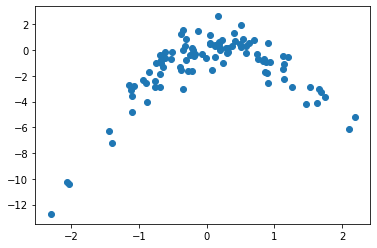

In [23]:
plt.scatter(x, y)

Plot shows quadratic relationship between X and Y with some noise.  
As normal distribution suggests, almost all examples lie in between [-2 * sigma, 2 * sigma] (sigma = 1)

In [35]:
data = pd.DataFrame(columns=['x', 'y'])
data.x = x
data['x^2'] = x ** 2
data['x^3'] = x ** 3
data['x^4'] = x ** 4
data.y = y

In [36]:
mse_array_1 = []
for i in range(len(data)):
    data_one_out = data.drop([i])
    model = LinearRegression().fit(data_one_out['x'].values.reshape(-1, 1), data_one_out['y'])
    pred_y = model.predict(data.iloc[i]['x'].reshape(1, -1))[0]
    mse_array_1.append((data.iloc[i]['y'] - pred_y) ** 2)

# quadratic   
mse_array_2 = []
for i in range(len(data)):
    data_one_out = data.drop([i])
    model = LinearRegression().fit(data_one_out[['x', 'x^2']], data_one_out['y'])
    pred_y = model.predict(data.iloc[i][['x', 'x^2']].values.reshape(1, -1))[0]
    mse_array_2.append((data.iloc[i]['y'] - pred_y) ** 2)

# cubic
mse_array_3 = []
for i in range(len(data)):
    data_one_out = data.drop([i])
    model = LinearRegression().fit(data_one_out[['x', 'x^2', 'x^3']], data_one_out['y'])
    pred_y = model.predict(data.iloc[i][['x', 'x^2', 'x^3']].values.reshape(1, -1))[0]
    mse_array_3.append((data.iloc[i]['y'] - pred_y) ** 2)

#biquadratic
mse_array_4 = []
for i in range(len(data)):
    data_one_out = data.drop([i])
    model = LinearRegression().fit(data_one_out[['x', 'x^2', 'x^3', 'x^4']], data_one_out['y'])
    pred_y = model.predict(data.iloc[i][['x', 'x^2', 'x^3', 'x^4']].values.reshape(1, -1))[0]
    mse_array_4.append((data.iloc[i]['y'] - pred_y) ** 2)

print(f'Simple MSE     : {np.mean(mse_array_1)}')
print(f'Quadratic MSE  : {np.mean(mse_array_2)}')
print(f'Cubic MSE      : {np.mean(mse_array_3)}')
print(f'Biquadratic MSE: {np.mean(mse_array_4)}')

Simple MSE     : 6.260764331604616
Quadratic MSE  : 0.9142897072803658
Cubic MSE      : 0.9268768781648802
Biquadratic MSE: 0.8669116865881079


There is no sense in using different random seeds, because the process is full determined, LOOCV does not perform random sampling.

Quadratic and biquadratic models have the lowest error. Biquadratic is slightly better, due to overfitting. 

In [40]:
model = sm.OLS(data['y'], sm.add_constant(data.drop(['y'], axis=1))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     163.0
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           1.24e-41
Time:                        10:28:46   Log-Likelihood:                -130.63
No. Observations:                 100   AIC:                             271.3
Df Residuals:                      95   BIC:                             284.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3140      0.136      2.311      0.023       0.044       0.584
x              0.9127      0.183      4.999      0.000       0.550       1.275
x^2           -2.5445      0.248    -10.264      0.000      -3.037      -2.052
x^3            0.0992      0.064      1.556      0.123      -0.027       0.226
x^4            0.1394      0.057      2.437      0.017       0.026       0.253
==============================================================================
Omnibus:                        1.537   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                1.088
Skew:                          -0.238   Prob(JB):                        0.581
Kurtosis:                       3.184   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-values show that `x^2` and `x` are statistically significant. `x^4` is less significant in presense of `x^2`, but is also useful, which suggests that biquadratic model is more powerful on train data.

# Ex. 9

In [52]:
from sklearn.utils import resample

In [44]:
dataset_file = '../datasets/Boston.csv'
data = pd.read_csv(dataset_file)

In [51]:
mu_hat = data.medv.mean()
se_hat = data.medv.std() / data.medv.size ** 0.5
mu_hat, se_hat

(22.532806324110677, 0.40886114749753505)

Standard error is standard deviation of sample mean from true mean.

In [57]:
mus = [resample(data.medv).mean() for _ in range(1000)]
np.std(mus)

0.40902913677666564

Bootstrap standard error is very similar to estimated one.

In [58]:
np.mean(mus) - 1.96 * np.std(mus), np.mean(mus) + 1.96 * np.std(mus)

(21.73602166662129, 23.339415882785822)

In [59]:
med_hat = data.medv.median()
med_hat

21.2

In [61]:
meds = [resample(data.medv).median() for _ in range(1000)]
np.mean(meds) - 1.96 * np.std(meds), np.mean(meds) + 1.96 * np.std(meds)

(20.43377610717347, 21.918023892826522)

`medv` median lies between (20.434, 21.918)

In [63]:
perc_hat = data.medv.quantile(0.1)
perc_hat

12.75

In [62]:
perc = [resample(data.medv).quantile(0.1) for _ in range(1000)]
np.mean(perc) - 1.96 * np.std(perc), np.mean(perc) + 1.96 * np.std(perc)

(11.756975341988813, 13.722024658011186)

`medv` tenth percentile lies between (11.757, 13.722)